In [1]:
#Importing needed libraries:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
sns.set(style="whitegrid")#setting grid for all plots

In [2]:
# Loading the dataset:
df3 = pd.read_csv('..\\Datasets_data.cso.ie\\PEA19.20231004T131056.csv')

In [3]:
# Displaying first 5 rows:
df3.head()

,STATISTIC Label,Year,Sex,Education Level,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration Aged 15 Years and Over (P...,2009,Both sexes,Higher secondary and below,Net migration,Thousand,-9.7
1,Estimated Migration Aged 15 Years and Over (P...,2009,Both sexes,Higher secondary and below,Emigrants: All destinations,Thousand,31.6
2,Estimated Migration Aged 15 Years and Over (P...,2009,Both sexes,Higher secondary and below,Immigrants: All origins,Thousand,21.9
3,Estimated Migration Aged 15 Years and Over (P...,2009,Both sexes,Post leaving cert,Net migration,Thousand,-0.2
4,Estimated Migration Aged 15 Years and Over (P...,2009,Both sexes,Post leaving cert,Emigrants: All destinations,Thousand,6.7


In [4]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df3_col_drop = ['STATISTIC Label','UNIT']
df3.drop(df3_col_drop ,axis=1, inplace=True)
# Renaming the columns
df3 = df3.rename(columns={'Education Level': 'Education_Level','Inward or Outward Flow':'Inward_or_Outward_Flow'})
# Dropping rows based on criteria these are distorting the dataset, we have subcategories hence subtotals in the df.
df3 = df3[~((df3['Sex'] == 'Both sexes') | (df3['Inward_or_Outward_Flow'] == 'Net migration') | (df3['Education_Level'] == 'All persons'))]

#df3['VALUE'] = df3['VALUE'].apply(lambda x: x * 1000)

In [5]:
df3.dtypes

Year                        int64
Sex                        object
Education_Level            object
Inward_or_Outward_Flow     object
VALUE                     float64
dtype: object

In [6]:
df3.head()

,Year,Sex,Education_Level,Inward_or_Outward_Flow,VALUE
16,2009,Male,Higher secondary and below,Emigrants: All destinations,18.6
17,2009,Male,Higher secondary and below,Immigrants: All origins,11.7
19,2009,Male,Post leaving cert,Emigrants: All destinations,5.1
20,2009,Male,Post leaving cert,Immigrants: All origins,2.9
22,2009,Male,Third level,Emigrants: All destinations,13.6


In [7]:
# Looking up distinct values within the df:
def df3_distinct(df3):
    for column in df3:
        unique_values = df3[column].unique()
        print(f"Unique values for {column}:")
        print(unique_values)
        print("\n")

# Calling the function.
df3_distinct(df3)

Unique values for Year:
[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


Unique values for Sex:
['Male' 'Female']


Unique values for Education_Level:
['Higher secondary and below' 'Post leaving cert' 'Third level'
 'Not stated']


Unique values for Inward_or_Outward_Flow:
['Emigrants: All destinations' 'Immigrants: All origins']


Unique values for VALUE:
[18.6 11.7  5.1  2.9 13.6 16.2  3.6  3.7 13.  10.2  1.6 10.8  3.4  4.6
 15.5  7.3  5.7  1.8 14.7  8.4  1.4 11.2  7.7  1.5  0.7 13.2 11.1  1.7
 15.7  8.9  4.  17.4 10.   2.2  1.1 14.4  2.4 18.4 12.4 15.6  9.7  5.
  2.3 11.8  1.  12.5  6.5 16.6 16.4  2.  16.   9.4  1.2 14.5 17.2  7.8
 15.4 14.8  0.8 13.4  7.6  3.   2.1  2.6  2.5 10.1  7.5 19.1  3.1  3.3
 10.7  9.   0.9 16.8  3.9  8.7 20.4  1.9  4.7  5.2 19.6  9.3 22.8  4.3
  9.2  2.7 13.9 23.8 24.7  3.8 11.3 11.  20.2  6.4  7.1 29.   8.6 13.3
 27.7  6.  15.  25.3 10.6  1.3  3.2 10.9 26.3  6.3  0.4 30.6  5.4  5.5
 18.5  6.1  4.4 17.1 24.1 16.3 30.   5.6 40.3]




# Studiying supervised learning techniques:

In [8]:
label_encoders = {}
categorical_columns = ["Sex", "Education_Level", "Inward_or_Outward_Flow"]
for col in categorical_columns:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col])
    label_encoders[col] = le


In [9]:
df3

,Year,Sex,Education_Level,Inward_or_Outward_Flow,VALUE
16,2009,1,0,0,18.6
17,2009,1,0,1,11.7
19,2009,1,2,0,5.1
20,2009,1,2,1,2.9
22,2009,1,3,0,13.6
...,...,...,...,...,...
620,2022,0,2,1,1.2
622,2022,0,3,0,14.4
623,2022,0,3,1,40.3
625,2022,0,1,0,1.3


In [10]:
# Looking up distinct values within the df:
def df3_distinct(df3):
    for column in df3:
        unique_values = df3[column].unique()
        print(f"Unique values for {column}:")
        print(unique_values)
        print("\n")

# Calling the function.
df3_distinct(df3)

Unique values for Year:
[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


Unique values for Sex:
[1 0]


Unique values for Education_Level:
[0 2 3 1]


Unique values for Inward_or_Outward_Flow:
[0 1]


Unique values for VALUE:
[18.6 11.7  5.1  2.9 13.6 16.2  3.6  3.7 13.  10.2  1.6 10.8  3.4  4.6
 15.5  7.3  5.7  1.8 14.7  8.4  1.4 11.2  7.7  1.5  0.7 13.2 11.1  1.7
 15.7  8.9  4.  17.4 10.   2.2  1.1 14.4  2.4 18.4 12.4 15.6  9.7  5.
  2.3 11.8  1.  12.5  6.5 16.6 16.4  2.  16.   9.4  1.2 14.5 17.2  7.8
 15.4 14.8  0.8 13.4  7.6  3.   2.1  2.6  2.5 10.1  7.5 19.1  3.1  3.3
 10.7  9.   0.9 16.8  3.9  8.7 20.4  1.9  4.7  5.2 19.6  9.3 22.8  4.3
  9.2  2.7 13.9 23.8 24.7  3.8 11.3 11.  20.2  6.4  7.1 29.   8.6 13.3
 27.7  6.  15.  25.3 10.6  1.3  3.2 10.9 26.3  6.3  0.4 30.6  5.4  5.5
 18.5  6.1  4.4 17.1 24.1 16.3 30.   5.6 40.3]




In [11]:
# Separating features and target variable
X = df3.drop("VALUE", axis=1)
y = df3["VALUE"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [13]:
# Evaluating the models
print("Random Forest Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Decision Tree Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree Mean Absolute Error:", mean_absolute_error(y_test, y_pred_dt))


Random Forest Mean Squared Error: 6.943538555555574
Random Forest Mean Absolute Error: 1.5603333333333353
Decision Tree Mean Squared Error: 13.202444444444442
Decision Tree Mean Absolute Error: 2.402222222222222


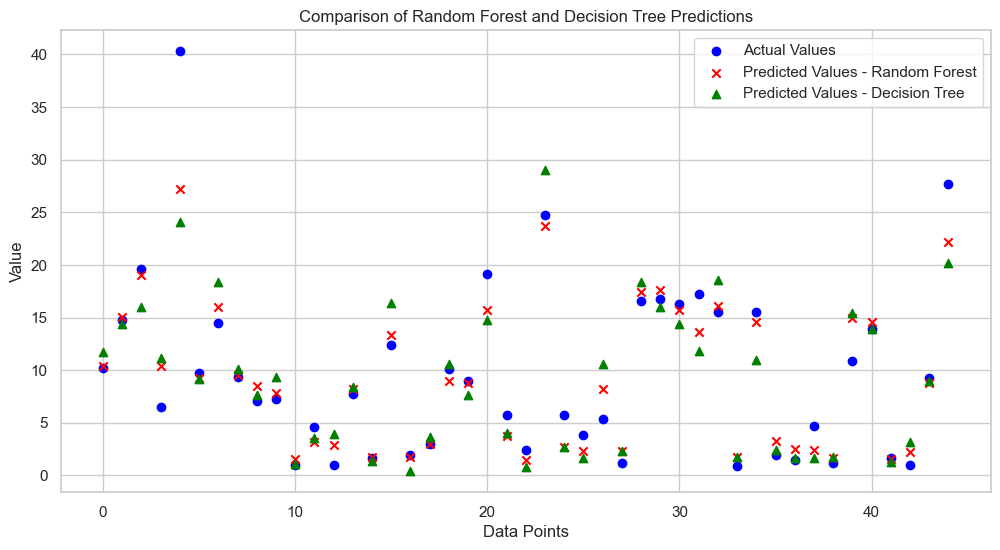

In [14]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(12, 6))

# Scatter plot for Random Forest
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_test)), y_pred_rf, color='red', label='Predicted Values - Random Forest', marker='x')

# Scatter plot for Decision Tree
plt.scatter(range(len(y_test)), y_pred_dt, color='green', label='Predicted Values - Decision Tree', marker='^')

plt.title('Comparison of Random Forest and Decision Tree Predictions')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.legend()
plt.show()


# Random forest

In [15]:
# Loading the dataset:
df3 = pd.read_csv('..\\Datasets_data.cso.ie\\PEA19.20231004T131056.csv')
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df3_col_drop = ['STATISTIC Label','UNIT']
df3.drop(df3_col_drop ,axis=1, inplace=True) 
# Renaming the columns
df3 = df3.rename(columns={'Education Level': 'Education_Level','Inward or Outward Flow':'Inward_or_Outward_Flow'})
# Dropping rows based on criteria
df3 = df3[~((df3['Sex'] == 'Both sexes') | (df3['Inward_or_Outward_Flow'] == 'Net migration') | (df3['Education_Level'] == 'All persons'))]

#df3['VALUE'] = df3['VALUE'].apply(lambda x: x * 1000)
df3

,Year,Sex,Education_Level,Inward_or_Outward_Flow,VALUE
16,2009,Male,Higher secondary and below,Emigrants: All destinations,18.6
17,2009,Male,Higher secondary and below,Immigrants: All origins,11.7
19,2009,Male,Post leaving cert,Emigrants: All destinations,5.1
20,2009,Male,Post leaving cert,Immigrants: All origins,2.9
22,2009,Male,Third level,Emigrants: All destinations,13.6
...,...,...,...,...,...
620,2022,Female,Post leaving cert,Immigrants: All origins,1.2
622,2022,Female,Third level,Emigrants: All destinations,14.4
623,2022,Female,Third level,Immigrants: All origins,40.3
625,2022,Female,Not stated,Emigrants: All destinations,1.3


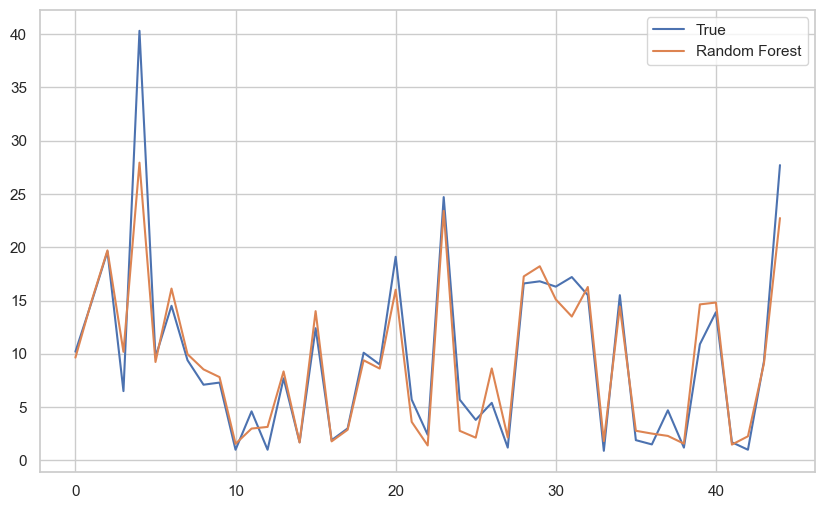

In [16]:
# Preprocessing for categorical columns
df3 = pd.get_dummies(df3, columns=['Sex', 'Education_Level', 'Inward_or_Outward_Flow'])

# Define features and target variable
X = df3.drop('VALUE', axis=1)
y = df3['VALUE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting Random Forest regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True')
plt.plot(model.predict(X_test), label='Random Forest')
plt.legend()
plt.show()


In [17]:
df3

,Year,VALUE,Sex_Female,Sex_Male,Education_Level_Higher secondary and below,Education_Level_Not stated,Education_Level_Post leaving cert,Education_Level_Third level,Inward_or_Outward_Flow_Emigrants: All destinations,Inward_or_Outward_Flow_Immigrants: All origins
16,2009,18.6,False,True,True,False,False,False,True,False
17,2009,11.7,False,True,True,False,False,False,False,True
19,2009,5.1,False,True,False,False,True,False,True,False
20,2009,2.9,False,True,False,False,True,False,False,True
22,2009,13.6,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
620,2022,1.2,True,False,False,False,True,False,False,True
622,2022,14.4,True,False,False,False,False,True,True,False
623,2022,40.3,True,False,False,False,False,True,False,True
625,2022,1.3,True,False,False,True,False,False,True,False


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the test set
y_pred = model.predict(X_test)

# Compute mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Mean Squared Error: {mse}")

# Compute mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Random Forest Mean Absolute Error: {mae}")


Random Forest Mean Squared Error: 6.483669311111127
Random Forest Mean Absolute Error: 1.5834000000000013


In [19]:
df3

,Year,VALUE,Sex_Female,Sex_Male,Education_Level_Higher secondary and below,Education_Level_Not stated,Education_Level_Post leaving cert,Education_Level_Third level,Inward_or_Outward_Flow_Emigrants: All destinations,Inward_or_Outward_Flow_Immigrants: All origins
16,2009,18.6,False,True,True,False,False,False,True,False
17,2009,11.7,False,True,True,False,False,False,False,True
19,2009,5.1,False,True,False,False,True,False,True,False
20,2009,2.9,False,True,False,False,True,False,False,True
22,2009,13.6,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
620,2022,1.2,True,False,False,False,True,False,False,True
622,2022,14.4,True,False,False,False,False,True,True,False
623,2022,40.3,True,False,False,False,False,True,False,True
625,2022,1.3,True,False,False,True,False,False,True,False


In [20]:
# Assuming X and y are your feature and target variables
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate mean squared error and mean absolute error for training and testing datasets
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print the results
print("Training Mean Squared Error:", mse_train)
print("Training Mean Absolute Error:", mae_train)
print("Testing Mean Squared Error:", mse_test)
print("Testing Mean Absolute Error:", mae_test)

# Compare the training and testing performance to assess whether the model is overfit or underfit

Training Mean Squared Error: 0.5923882681564242
Training Mean Absolute Error: 0.5571061452513966
Testing Mean Squared Error: 6.336498111111132
Testing Mean Absolute Error: 1.5566000000000018


Model is underfitted

In [21]:
# Assuming X and y are your feature and target variables
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate mean squared error and mean absolute error for training and testing datasets
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print the results
print("Training Mean Squared Error:", mse_train)
print("Training Mean Absolute Error:", mae_train)
print("Testing Mean Squared Error:", mse_test)
print("Testing Mean Absolute Error:", mae_test)

# Compare the training and testing performance to assess whether the model is overfit or underfit

Training Mean Squared Error: 0.7191514196428564
Training Mean Absolute Error: 0.5737946428571433
Testing Mean Squared Error: 6.547524330357151
Testing Mean Absolute Error: 1.7018839285714298


By changing the test size the model is overfitted

# Evaluating the performance of linear regression models on PEA04.20231004T131011.csv

In [22]:
# Loading the dataset:
df4 = pd.read_csv('..\\Datasets_data.cso.ie\\PEA04.20231004T131011.csv')

In [23]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6669 entries, 0 to 6668
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  6669 non-null   object 
 1   Year             6669 non-null   int64  
 2   Age Group        6669 non-null   object 
 3   Sex              6669 non-null   object 
 4   Region           6669 non-null   object 
 5   UNIT             6669 non-null   object 
 6   VALUE            6669 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 364.8+ KB


In [24]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df4_col_drop = ['STATISTIC Label','UNIT']
df4.drop(df4_col_drop ,axis=1, inplace=True) 

In [25]:
# Renaming the columns
df4 = df4.rename(columns={'Age Group': 'Age_Group','VALUE':'Population'})

In [26]:
# Dropping rows based on criteria
df4 = df4[~((df4['Age_Group'] == 'All ages') | (df4['Sex'] == 'Both sexes') | (df4['Region'] == 'State'))]

In [27]:
# Convert the 'value' column to the full number format
df4['Population'] = df4['Population'].apply(lambda x: int(float(x) * 1000))

In [28]:
# obj_cols are the object columns
obj_cols = ['Age_Group', 'Sex','Region']

# Creating label encoder object
label_encoder = LabelEncoder()

# Encoding each of the object columns
for col in obj_cols:
    df4[col] = label_encoder.fit_transform(df4[col])

# Columns encoded to int64 or float64
print(df4.dtypes)

Year          int64
Age_Group     int32
Sex           int32
Region        int32
Population    int64
dtype: object


In [29]:
df4

,Year,Age_Group,Sex,Region,Population
10,2011,0,1,0,15800
11,2011,0,1,7,16600
12,2011,0,1,3,18000
13,2011,0,1,5,16400
14,2011,0,1,6,25500
...,...,...,...,...,...
6637,2023,17,0,5,5000
6638,2023,17,0,6,8100
6639,2023,17,0,1,15500
6640,2023,17,0,2,6000


In [30]:
# Declare a variable named as 'X' and 'y'
X = df4.iloc[:, :-1].values               # All features (independent varaibles) except Population
y = df4['Population'].values                    # Target variable

# Split the data into 70% and 30% by using a parameter test_size = 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Display the size of the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3744, 4), (3744,), (2620, 4), (1124, 4), (2620,), (1124,))

In [31]:
# Initialise an object slr by calling a method named as 'LinearRegression()'
slr = LinearRegression()

# Training the model
slr.fit(X_train, y_train)

# Predict the results for the training and testing
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

# Display the values of y_train_pred and y_test_pred
print(y_train_pred, '\t', y_test_pred)

[15962.3416374  19684.82169819 10382.63564061 ... 15441.72637828
 25016.04206233 15788.18243718] 	 [ 5596.88819767 13005.25281002 20899.97122976 ... 26901.59513186
  5818.29787528  4277.10699407]


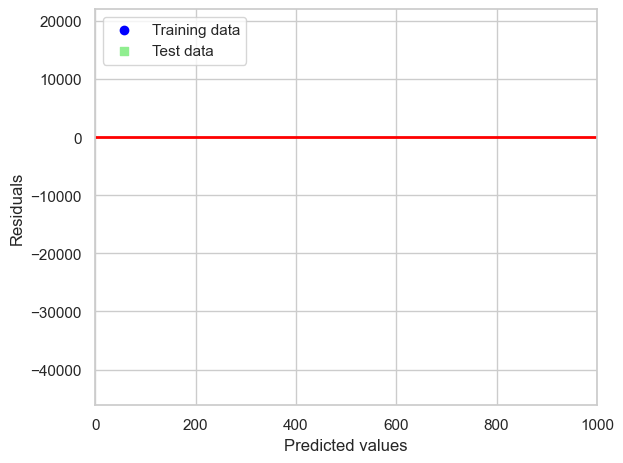

In [32]:
# Display the graph for the training and testing of the data
plt.scatter(y_train_pred,  y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 1000, lw = 2, color = 'red')
plt.xlim([0, 1000])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

In [33]:
print(y_train_pred - y_train)

[  5662.3416374   -1515.17830181   6882.63564061 ...  -9258.27362172
  14216.04206233 -13511.81756282]


In [34]:

# Display the means squared error and r2 score values
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 98036858.394, test: 99443223.682
R^2 train: 0.253, test: 0.230


# Ridge Regression

In [35]:
# Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_train, y_train)

# Display the score by using ridge object
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.25
Test set score: 0.23


In [36]:
# alpha = 10 is a parameter using a fit() method
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.25
Test set score: 0.23


In [37]:
# alpha = 0.1 is a parameter using a fit() method
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.25
Test set score: 0.23


# Lasso Regression

In [38]:
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.25
Test set score: 0.23
Number of features used: 4


In [39]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.25
Test set score: 0.23
Number of features used: 4


In [40]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.25
Test set score: 0.23
Number of features used: 4


# Decision tree regression

In [41]:
# Method or Function for Linear Regression plot
def lin_regplot(X, y, model):
    plt.scatter(X, y, c = 'blue')
    plt.plot(X, model.predict(X), color = 'red', linewidth = 2)    
    return

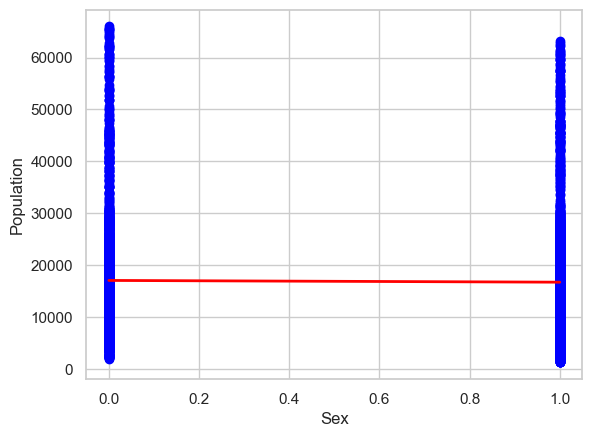

In [42]:
# Store the feature or attribute values in X and y
X = df4[['Sex']].values
y = df4['Population'].values

# Initialise an object by calling a method DecisionTreeRegressor()
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X, y)

# Return a copy of the array collapsed into one dimension.
sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Sex')
plt.ylabel('Population')
# plt.savefig('./figures/tree_regression.png', dpi = 300)
plt.show()

# Random Forest regression

In [43]:
# Declaration of Varaibles
X = df4.iloc[:, :-1].values          # Store all columns into an array (X) except last column, 'Population'
y = df4['Population'].values               # Store last column into an array (y)

# Use train_test_split method to split the data into 40% and 60%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [44]:
# Create an object forest by calling a method RandomForestRegressor()
forest = RandomForestRegressor(n_estimators = 1000, 
                               criterion='squared_error',  # Change 'mse' to 'squared_error'
                               random_state = 1, 
                               n_jobs = -1)

# Train the Model by calling a fit() method
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Display the r2 score values
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.999, test: 0.996


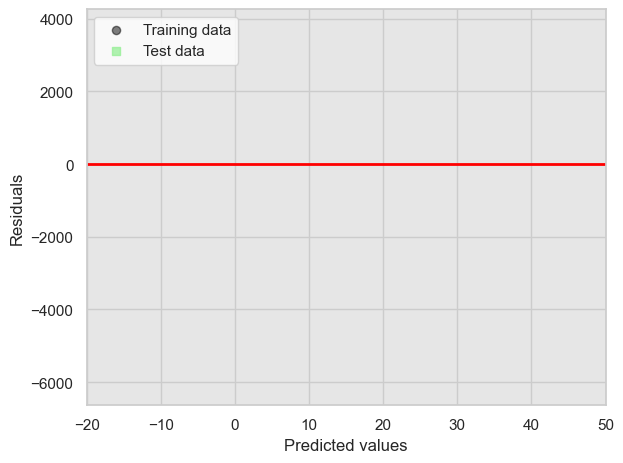

In [45]:
# Draw a scatter plot
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c = 'black', 
            marker = 'o', 
            s = 35,
            alpha = 0.5,
            label = 'Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c = 'lightgreen', 
            marker = 's', 
            s = 35,
            alpha = 0.7,
            label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -20, xmax = 50, lw = 2, color = 'red')
plt.xlim([-20, 50])
ax = plt.gca()
ax.set_facecolor('#e6e6e6')  # Change the background color to light gray
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()